## Script para ajuste dos dados

Text(0, 0.5, 'CO2 (%)')

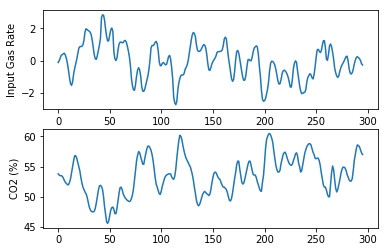

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = '../Data/Online Prediction/Box-Jenkins_Gas-furnace.txt'
names = ['Input Gas Rate', 'CO2 (%)']

def createDataSet(path,_names):
    data = pd.read_csv(path, header=None, names=_names)
    return data

box_jenkins = createDataSet(path,names)

# Visualize data
box_jenkins.head(2)

#Plotando names[0] - Input Gas Rate
plt.subplot(211)
plt.plot(box_jenkins[names[0]])
plt.ylabel(names[0])

#Plotando Concentração de CO2
plt.subplot(212)
plt.plot(box_jenkins['CO2 (%)'])
plt.ylabel('CO2 (%)')



Text(0, 0.5, 'CO2 (%)')

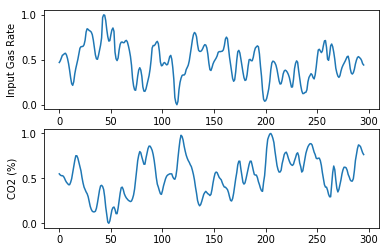

In [8]:
# Scale input and output
scaled_box_jenkins = box_jenkins.copy()
length = len(scaled_box_jenkins.T)
for i in range(length):
    scaled_box_jenkins.iloc[:,i] = ((box_jenkins.iloc[:,i] - box_jenkins.iloc[:,i].min())
                          / (box_jenkins.iloc[:,i].max() - box_jenkins.iloc[:,i].min()))
    
#Plotando names[0] - Input Gas Rate
plt.subplot(211)
plt.plot(scaled_box_jenkins[names[0]])
plt.ylabel(names[0])

#Plotando Concentração de CO2
plt.subplot(212)
plt.plot(scaled_box_jenkins.iloc[:,1])
plt.ylabel('CO2 (%)')

Teste

Text(0, 0.5, 'CO2 (%)')

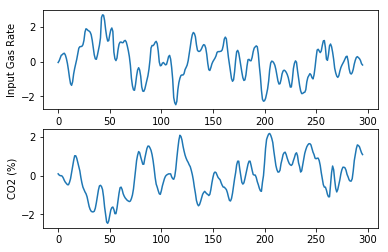

In [9]:
# Standardize input and output
standardized_box_jenkins = box_jenkins.copy()
for i in range(length):
    standardized_box_jenkins.iloc[:,i] = ((box_jenkins.iloc[:,i] - box_jenkins.iloc[:,i].mean())
                          / box_jenkins.iloc[:,i].std())
    
#Plotando names[0] - Input Gas Rate
plt.subplot(211)
plt.plot(standardized_box_jenkins[names[0]])
plt.ylabel(names[0])

#Plotando Concentração de CO2
plt.subplot(212)
plt.plot(standardized_box_jenkins.iloc[:,1])
plt.ylabel('CO2 (%)')

In [10]:
# Add delayed features
standardized_box_jenkins['Input Gas Rate (-1)'] = standardized_box_jenkins['Input Gas Rate'].shift(periods=1)
standardized_box_jenkins.loc[0,'Input Gas Rate (-1)'] = standardized_box_jenkins.loc[1,'Input Gas Rate (-1)']

standardized_box_jenkins['Input Gas Rate (-2)'] = standardized_box_jenkins['Input Gas Rate (-1)'].shift(periods=1)
standardized_box_jenkins.loc[0,'Input Gas Rate (-2)'] = standardized_box_jenkins.loc[1,'Input Gas Rate (-2)']

standardized_box_jenkins['Input Gas Rate (-3)'] = standardized_box_jenkins['Input Gas Rate (-2)'].shift(periods=1)
standardized_box_jenkins.loc[0,'Input Gas Rate (-3)'] = standardized_box_jenkins.loc[1,'Input Gas Rate (-3)']

standardized_box_jenkins['CO2 (%) (-1)'] = standardized_box_jenkins['CO2 (%)'].shift(periods=1)
standardized_box_jenkins.loc[0,'CO2 (%) (-1)'] = standardized_box_jenkins.loc[1,'CO2 (%) (-1)']

standardized_box_jenkins['CO2 (%) (-2)'] = standardized_box_jenkins['CO2 (%) (-1)'].shift(periods=1)
standardized_box_jenkins.loc[0,'CO2 (%) (-2)'] = standardized_box_jenkins.loc[1,'CO2 (%) (-2)']

standardized_box_jenkins['CO2 (%) (-3)'] = standardized_box_jenkins['CO2 (%) (-2)'].shift(periods=1)
standardized_box_jenkins.loc[0,'CO2 (%) (-3)'] = standardized_box_jenkins.loc[1,'CO2 (%) (-3)']

## Treinamento com dados padronizados STANDARDIZED

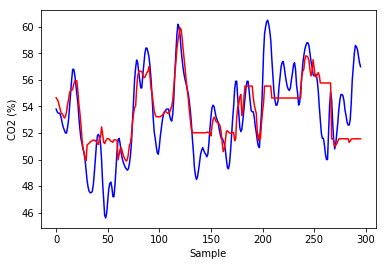

In [11]:
import warnings
warnings.filterwarnings('ignore')
# Train and estimate model performance
from sklearn.model_selection import cross_val_predict
# Import neural network for regression
from sklearn.neural_network import MLPRegressor

# Import function for cross-validation
from sklearn.model_selection import cross_val_score
# Define neural network architecture
# Two hidden layers with three neurons each
mlp = MLPRegressor(hidden_layer_sizes=(3,3))

y_pred = cross_val_predict(mlp,
                           standardized_box_jenkins[['Input Gas Rate', 
                                                     'Input Gas Rate (-1)', 
                                                     'Input Gas Rate (-2)',
                                                     'Input Gas Rate (-3)', 
                                                     'CO2 (%) (-1)', 
                                                     'CO2 (%) (-2)', 
                                                     'CO2 (%) (-3)']],
                           standardized_box_jenkins['CO2 (%)'],
                           cv=10)

# Rescale prediction
y_pred = (y_pred
          * box_jenkins['CO2 (%)'].std()
         + box_jenkins['CO2 (%)'].mean())

# Plot CO2 series
plt.plot(box_jenkins['CO2 (%)'], color='blue')
plt.plot(y_pred, color='red')
plt.ylabel('CO2 (%)'), plt.xlabel('Sample');

## Treinamento com dado escalados entre 0 e 1 SCALED

In [12]:
# Add delayed features
scaled_box_jenkins['Input Gas Rate (-1)'] = scaled_box_jenkins['Input Gas Rate'].shift(periods=1)
scaled_box_jenkins.loc[0,'Input Gas Rate (-1)'] = scaled_box_jenkins.loc[1,'Input Gas Rate (-1)']

scaled_box_jenkins['Input Gas Rate (-2)'] = scaled_box_jenkins['Input Gas Rate (-1)'].shift(periods=1)
scaled_box_jenkins.loc[0,'Input Gas Rate (-2)'] = scaled_box_jenkins.loc[1,'Input Gas Rate (-2)']

scaled_box_jenkins['Input Gas Rate (-3)'] = scaled_box_jenkins['Input Gas Rate (-2)'].shift(periods=1)
scaled_box_jenkins.loc[0,'Input Gas Rate (-3)'] = scaled_box_jenkins.loc[1,'Input Gas Rate (-3)']

scaled_box_jenkins['CO2 (%) (-1)'] = scaled_box_jenkins['CO2 (%)'].shift(periods=1)
scaled_box_jenkins.loc[0,'CO2 (%) (-1)'] = scaled_box_jenkins.loc[1,'CO2 (%) (-1)']

scaled_box_jenkins['CO2 (%) (-2)'] = scaled_box_jenkins['CO2 (%) (-1)'].shift(periods=1)
scaled_box_jenkins.loc[0,'CO2 (%) (-2)'] = scaled_box_jenkins.loc[1,'CO2 (%) (-2)']

scaled_box_jenkins['CO2 (%) (-3)'] = scaled_box_jenkins['CO2 (%) (-2)'].shift(periods=1)
scaled_box_jenkins.loc[0,'CO2 (%) (-3)'] = scaled_box_jenkins.loc[1,'CO2 (%) (-3)']



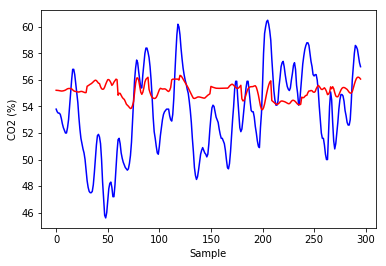

In [13]:

mlp = MLPRegressor(hidden_layer_sizes=(3,3))

y_pred = cross_val_predict(mlp,
                           scaled_box_jenkins[['Input Gas Rate', 
                                                     'Input Gas Rate (-1)', 
                                                     'Input Gas Rate (-2)',
                                                     'Input Gas Rate (-3)', 
                                                     'CO2 (%) (-1)', 
                                                     'CO2 (%) (-2)', 
                                                     'CO2 (%) (-3)']],
                           scaled_box_jenkins['CO2 (%)'],
                           cv=10)

# Rescale prediction
y_pred = (y_pred
          * box_jenkins['CO2 (%)'].std()
         + box_jenkins['CO2 (%)'].mean())

# Plot CO2 series
plt.plot(box_jenkins['CO2 (%)'], color='blue')
plt.plot(y_pred, color='red')
plt.ylabel('CO2 (%)'), plt.xlabel('Sample');

## Utilizando SVR para regressão

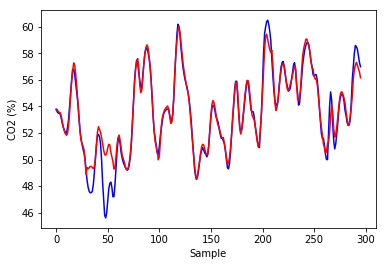

In [14]:
# Import model
from sklearn.svm import SVR

# Train and estimate model performance
y_pred = cross_val_predict(SVR(),
                           standardized_box_jenkins[['Input Gas Rate', 
                                                     'Input Gas Rate (-1)', 
                                                     'Input Gas Rate (-2)',
                                                     'Input Gas Rate (-3)', 
                                                     'CO2 (%) (-1)', 
                                                     'CO2 (%) (-2)', 
                                                     'CO2 (%) (-3)']],
                           standardized_box_jenkins['CO2 (%)'],
                           cv=10)

# Rescale prediction
y_pred = (y_pred
          * box_jenkins['CO2 (%)'].std()
         + box_jenkins['CO2 (%)'].mean())

# Plot CO2 series
plt.plot(box_jenkins['CO2 (%)'], color='blue')
plt.plot(y_pred, color='red')
plt.ylabel('CO2 (%)'), plt.xlabel('Sample');